<a href="https://colab.research.google.com/github/SimranJHAA/MNIST-/blob/main/MNISTDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA LOADING

In [ ]:
#Importing necessary modules
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

# Transformations for the training set and the test set
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download + load training + test datasets
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17694864.15it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 550019.27it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2648424.34it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8592931.33it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



OBSERVING THE DATA FEATURES

In [ ]:
print(train_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
print(test_set)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
print(train_set.data.size())
print(train_set.targets.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


VISUALISING IMAGE

enter the image number you want to see : 9


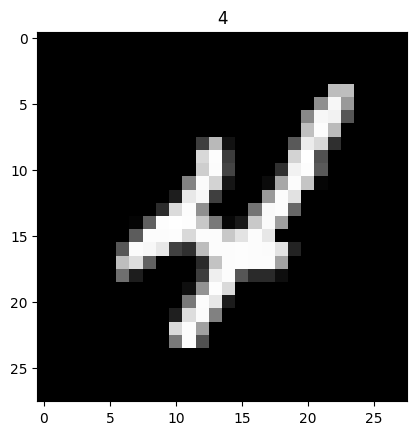

In [ ]:
#Printing image
i=int(input("enter the image number you want to see : "))
import matplotlib.pyplot as plt
plt.imshow(train_set.data[i], cmap='gray')
plt.title('%i' % train_set.targets[i])
plt.show()

MODEL 1 (FCNN/FULLY CONNECTED NEURAL NETWORK)

In [ ]:
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        # Define the fully connected layers
        self.fc1 = nn.Linear(28*28, 512)  # Input: 784 (28*28), Output: 512
        self.fc2 = nn.Linear(512, 256)    # Input: 512, Output: 256
        self.fc3 = nn.Linear(256, 10)     # Input: 256, Output: 10 (number of classes)

    def forward(self, x):
        x = x.view(-1, 28*28)             # Flattening
        x = torch.relu(self.fc1(x))       # ReLU activation
        x = torch.relu(self.fc2(x))       # ReLU activation
        x = self.fc3(x)                   # Output layer
        return x


MODEL 2 (ConvFCNN/CONVOLUTIONAL NEURAL NETWORK+FULLY CONNECTED NEURAL NETWORK)

In [ ]:
class ConvFCNN(nn.Module):
    def __init__(self):
        super(ConvFCNN, self).__init__()
        # 1st convolutional layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Input: 1 channel, Output: 32 channels
        # 2nd convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # Input: 32 channels, Output: 64 channels
        # Fully connected layer
        self.fc1 = nn.Linear(64*7*7, 128)  # Input: 64*7*7 (after pooling), Output: 128
        # Output layer
        self.fc2 = nn.Linear(128, 10)      # Input: 128, Output: 10 (number of classes)
        # Max-pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)       # Reduces each dimension

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x))) # 1st convolutional layer + ReLU + pooling
        x = self.pool(torch.relu(self.conv2(x))) # 2nd convolutional layer +ReLU + pooling
        x = x.view(-1, 64*7*7)                  # Flattening layer
        x = torch.relu(self.fc1(x))             # ReLU activation function
        x = self.fc2(x)                         # Output layer
        return x


MODEL 3 (CNN/CONVOLUTIONAL NEURAL NETWORK)

In [ ]:
class ConvOnly(nn.Module):
    def __init__(self):
        super(ConvOnly, self).__init__()
        # 1st convolutional layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Input: 1 channel, Output: 32 channels
        # 2nd convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # Input: 32 channels, Output: 64 channels
        # 3rd third convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1) # Input: 64 channels, Output: 128 channels
        # Max-pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)       # Reduces each dimension by a factor of 2
        # Global average pooling layer
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))                # Output: 128 channels with 1x1 dimensions

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x))) # 1st convolutional layer + ReLU + pooling
        x = self.pool(torch.relu(self.conv2(x))) # 2nd convolutional layer + ReLU + pooling
        x = torch.relu(self.conv3(x))            # 3rd convolutional layer + ReLU
        x = self.global_avg_pool(x)              # Apply global average pooling
        x = x.view(-1, 128)                      # Flatten the output
        return x


TRAINING

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Instantiate the models, define the loss function and the optimizer
model1 = FCNN()
model2 = ConvFCNN()
model3 = ConvOnly()

criterion = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)
optimizer3 = optim.SGD(model3.parameters(), lr=0.01, momentum=0.9)

# Train the models
print("Training Model 1 (FCNN):")
train_model(model1, train_loader, criterion, optimizer1)

print("Training Model 2 (ConvFCNN):")
train_model(model2, train_loader, criterion, optimizer2)

print("Training Model 3 (ConvOnly):")
train_model(model3, train_loader, criterion, optimizer3)


Training Model 1 (FCNN):
Epoch [1/5], Loss: 0.3903
Epoch [2/5], Loss: 0.1514
Epoch [3/5], Loss: 0.1085
Epoch [4/5], Loss: 0.0851
Epoch [5/5], Loss: 0.0705
Training Model 2 (ConvFCNN):
Epoch [1/5], Loss: 0.2414
Epoch [2/5], Loss: 0.0542
Epoch [3/5], Loss: 0.0372
Epoch [4/5], Loss: 0.0288
Epoch [5/5], Loss: 0.0224
Training Model 3 (ConvOnly):
Epoch [1/5], Loss: 1.4026
Epoch [2/5], Loss: 0.3636
Epoch [3/5], Loss: 0.2253
Epoch [4/5], Loss: 0.1717
Epoch [5/5], Loss: 0.1445


SAVING THE MODELS

In [ ]:
# Save the models
torch.save(model1.state_dict(), 'model1.pth')
torch.save(model2.state_dict(), 'model2.pth')
torch.save(model3.state_dict(), 'model3.pth')

# Function to load a saved model and perform fine-tuning
def load_and_finetune(model, model_path, train_loader, criterion, optimizer, num_epochs=2):
    model.load_state_dict(torch.load(model_path))
    model.train()  # Set the model to training mode
    train_model(model, train_loader, criterion, optimizer, num_epochs)

# Fine-tune the models
print("Fine-tuning Model 1 (FCNN):")
load_and_finetune(model1, 'model1.pth', train_loader, criterion, optimizer1)

print("Fine-tuning Model 2 (ConvFCNN):")
load_and_finetune(model2, 'model2.pth', train_loader, criterion, optimizer2)

print("Fine-tuning Model 3 (ConvOnly):")
load_and_finetune(model3, 'model3.pth', train_loader, criterion, optimizer3)


Fine-tuning Model 1 (FCNN):
Epoch [1/2], Loss: 0.0579
Epoch [2/2], Loss: 0.0489
Fine-tuning Model 2 (ConvFCNN):
Epoch [1/2], Loss: 0.0176
Epoch [2/2], Loss: 0.0145
Fine-tuning Model 3 (ConvOnly):
Epoch [1/2], Loss: 0.1256
Epoch [2/2], Loss: 0.1122


In [ ]:
from sklearn.model_selection import KFold

def k_fold_cross_validation(model_class, dataset, k=5, num_epochs=5):
    kfold = KFold(n_splits=k, shuffle=True)
    results = []

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset)):
        print(f'FOLD {fold}')
        print('--------------------------------')

        # Sample elements randomly from a given list of ids, no replacement.
        train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
        val_subsampler = torch.utils.data.SubsetRandomSampler(val_ids)

        # Define data loaders for training and validation
        trainloader = torch.utils.data.DataLoader(dataset, batch_size=64, sampler=train_subsampler)
        valloader = torch.utils.data.DataLoader(dataset, batch_size=64, sampler=val_subsampler)

        # Initialize model
        model = model_class()
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
        criterion = nn.CrossEntropyLoss()




APPLYING K FOLD AND CHECKING ACCURACY

In [ ]:
from torch.utils.data import DataLoader, random_split, SubsetRandomSampler
import numpy as np
def evaluate_model(model, data_loader):
    correct = 0
    total = 0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    model.train()  # Set the model back to training mode
    return accuracy

def k_fold_cross_validation(model_class, dataset, k=5, num_epochs=5):
    kfold = KFold(n_splits=k, shuffle=True)
    results = []

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset)):
        print(f'FOLD {fold}')
        print('--------------------------------')

        # Sample elements randomly from a given list of ids, no replacement.
        train_subsampler = SubsetRandomSampler(train_ids)
        val_subsampler = SubsetRandomSampler(val_ids)

        # Define data loaders for training and validation
        trainloader = DataLoader(dataset, batch_size=64, sampler=train_subsampler)
        valloader = DataLoader(dataset, batch_size=64, sampler=val_subsampler)

        # Initialize model
        model = model_class()
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
        criterion = nn.CrossEntropyLoss()

        # Train the model
        train_model(model, trainloader, criterion, optimizer, num_epochs)

        # Evaluate the model
        accuracy = evaluate_model(model, valloader)
        print(f'Accuracy for fold {fold}: {accuracy:.2f}%')
        results.append(accuracy)

    avg_accuracy = np.mean(results)
    print(f'Average accuracy across {k} folds: {avg_accuracy:.2f}%')
    return avg_accuracy

# Perform K-Fold Cross Validation for each model

print("K-Fold Cross Validation for Model 1 (FCNN):")
fcnn_accuracy = k_fold_cross_validation(FCNN, train_set)

print("K-Fold Cross Validation for Model 2 (ConvFCNN):")
convfcnn_accuracy = k_fold_cross_validation(ConvFCNN, train_set)

print("K-Fold Cross Validation for Model 3 (ConvOnly):")
convonly_accuracy = k_fold_cross_validation(ConvOnly, train_set)


K-Fold Cross Validation for Model 1 (FCNN):
FOLD 0
--------------------------------
Epoch [1/5], Loss: 0.4329
Epoch [2/5], Loss: 0.1753
Epoch [3/5], Loss: 0.1230
Epoch [4/5], Loss: 0.0944
Epoch [5/5], Loss: 0.0770
Accuracy for fold 0: 97.03%
FOLD 1
--------------------------------
Epoch [1/5], Loss: 0.4332
Epoch [2/5], Loss: 0.1762
Epoch [3/5], Loss: 0.1228
Epoch [4/5], Loss: 0.0956
Epoch [5/5], Loss: 0.0786
Accuracy for fold 1: 97.24%
FOLD 2
--------------------------------
Epoch [1/5], Loss: 0.4321
Epoch [2/5], Loss: 0.1767
Epoch [3/5], Loss: 0.1237
Epoch [4/5], Loss: 0.0971
Epoch [5/5], Loss: 0.0766
Accuracy for fold 2: 97.36%
FOLD 3
--------------------------------
Epoch [1/5], Loss: 0.4428
Epoch [2/5], Loss: 0.1824
Epoch [3/5], Loss: 0.1221
Epoch [4/5], Loss: 0.0956
Epoch [5/5], Loss: 0.0794
Accuracy for fold 3: 96.83%
FOLD 4
--------------------------------
Epoch [1/5], Loss: 0.4285
Epoch [2/5], Loss: 0.1768
Epoch [3/5], Loss: 0.1233
Epoch [4/5], Loss: 0.0948
Epoch [5/5], Loss: 0

EVALUATION



In [ ]:
# Train the models fully and evaluate them on the test set
def train_and_evaluate(model_class, train_loader, test_loader, num_epochs=5):
    model = model_class()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    # Train the model
    train_model(model, train_loader, criterion, optimizer, num_epochs)

    # Evaluate the model
    test_accuracy = evaluate_model(model, test_loader)
    print(f'Test accuracy: {test_accuracy:.2f}%')
    return test_accuracy

print("Final Evaluation on Test Set")

print("Model 1 (FCNN):")
fcnn_test_accuracy = train_and_evaluate(FCNN, train_loader, test_loader)

print("Model 2 (ConvFCNN):")
convfcnn_test_accuracy = train_and_evaluate(ConvFCNN, train_loader, test_loader)

print("Model 3 (ConvOnly):")
convonly_test_accuracy = train_and_evaluate(ConvOnly, train_loader, test_loader)


Final Evaluation on Test Set
Model 1 (FCNN):
Epoch [1/5], Loss: 0.3895
Epoch [2/5], Loss: 0.1518
Epoch [3/5], Loss: 0.1070
Epoch [4/5], Loss: 0.0838
Epoch [5/5], Loss: 0.0685
Test accuracy: 97.20%
Model 2 (ConvFCNN):
Epoch [1/5], Loss: 0.2437
Epoch [2/5], Loss: 0.0539
Epoch [3/5], Loss: 0.0357
Epoch [4/5], Loss: 0.0276
Epoch [5/5], Loss: 0.0221
Test accuracy: 98.98%
Model 3 (ConvOnly):
Epoch [1/5], Loss: 1.3296
Epoch [2/5], Loss: 0.3790
Epoch [3/5], Loss: 0.2250
Epoch [4/5], Loss: 0.1793
Epoch [5/5], Loss: 0.1479
Test accuracy: 95.81%
